# BRAN2020 clim demo animate

Date: 8 April, 2024

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

### BRAN2020 is on the order of 100TB of float data over nearly 9000 `netcdf` file assests in total.

#### required packages

In [1]:
import intake
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#more plotting
import matplotlib.dates as mdates
import streamjoy
from streamjoy import stream
#import seaborn as sns

#### ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### start a local Dask client

In [3]:
import dask
import distributed

with dask.config.set({"distributed.scheduler.worker-saturation": 1.0,
                      "distributed.nanny.pre-spawn-environ.MALLOC_TRIM_THRESHOLD_": 0,
                    "logging.distributed'": "error"}):
    client = distributed.Client()

# where are the results:

In [5]:
results_path = '/g/data/es60/users/thomas_moore/clim_demo_results/daily/draft_delivery/'
mld_file = results_path+'BRAN2020_clim_demo_mld.nc'
eta_t_file = results_path+'BRAN2020_clim_demo_eta_t.nc'
temp_file = results_path+'BRAN2020_clim_demo_temp.nc'

In [6]:
mld_stats_dataset = xr.open_dataset(mld_file,chunks={})
mld_stats_equator = mld_stats_dataset.sel(yt_ocean=0,method='nearest')
mld_stats_equator_march = mld_stats_equator.isel(month=2)

In [7]:
eta_t_stats_dataset = xr.open_dataset(eta_t_file,chunks={})
eta_t_stats_equator = eta_t_stats_dataset.sel(yt_ocean=0,method='nearest')
eta_t_stats_equator_march = eta_t_stats_equator.isel(month=2)

In [8]:
temp_stats_dataset = xr.open_dataset(temp_file,chunks={})
temp_stats_equator = temp_stats_dataset.sel(yt_ocean=0,method='nearest')
temp_t_stats_equator_march = temp_stats_equator.isel(month=2)

In [9]:
### plot directory
plot_directory = '/g/data/es60/users/thomas_moore/clim_demo_results/plots/'

In [8]:
# Define a dictionary to map variable names to colors
mld_color_dict = {
    'mean_mld': 'black',
    'min_mld': 'navy',
    'max_mld': 'red',
    'std_mld': 'lightgrey',
    'median_mld':'darkgrey',
    'quantile_05_mld':'lightblue' ,
    'quantile_95_mld': 'orange'
}

In [9]:
mld_stats_equator

<xarray.Dataset> Size: 2MB
Dimensions:          (month: 12, xt_ocean: 3600)
Coordinates:
  * xt_ocean         (xt_ocean) float64 29kB 0.05 0.15 0.25 ... 359.9 360.0
    yt_ocean         float64 8B 0.05
  * month            (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mean_mld         (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    min_mld          (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    max_mld          (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    std_mld          (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    median_mld       (month, xt_ocean) float32 173kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    quantile_05_mld  (month, xt_ocean) float64 346kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
    quantile_95_mld  (month, xt_ocean) float64 346kB dask.array<chunksize=(12, 3600), meta=np.ndarray>
Attributes: (12/13)
    NumFilesInSet:                   20
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    grid_tile:                       N/A
    grid_type:                       regular
    intake_esm_attrs:_data_format_:  netcdf
    ...                              ...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:time_period:    daily
    intake_esm_attrs:variable:       mld
    intake_esm_dataset_key:          ocean.daily
    intake_esm_vars:                 mld
    title:                           BRAN2020

<Client: 'tcp://127.0.0.1:33259' processes=7 threads=14, memory=63.00 GiB>

[SUCCESS] 04:48PM: Saved stream to /g/data/es60/users/thomas_moore/clim_demo_results/plots/test.gif.
[WARNING] 04:48PM: The output displayed below could be an older, cached version; click the path above to view the latest.


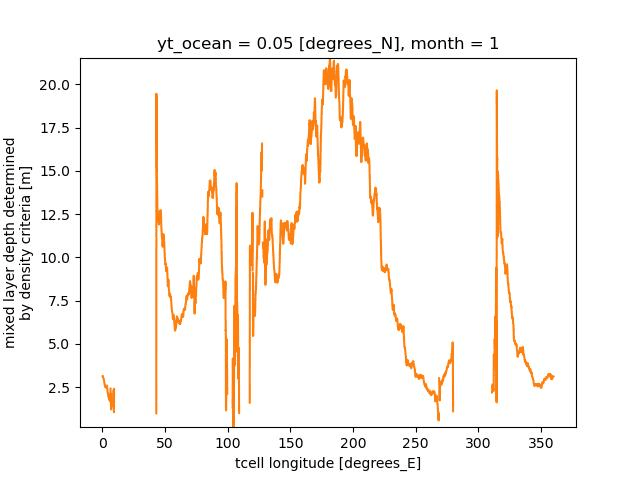

PosixPath('/g/data/es60/users/thomas_moore/clim_demo_results/plots/test.gif')

In [19]:
ds = mld_stats_equator
stream(ds, uri="/g/data/es60/users/thomas_moore/clim_demo_results/plots/test.gif",var='std_mld',dim='month')

[WARNING] 04:51PM: No 'var' specified; using the default 'std_mld' from the dataset. Suppress this by passing 'var'.


<Client: 'tcp://127.0.0.1:33259' processes=7 threads=14, memory=63.00 GiB>

[SUCCESS] 04:51PM: Saved stream to /g/data/es60/users/thomas_moore/clim_demo_results/plots/test.gif.
[WARNING] 04:51PM: The output displayed below could be an older, cached version; click the path above to view the latest.


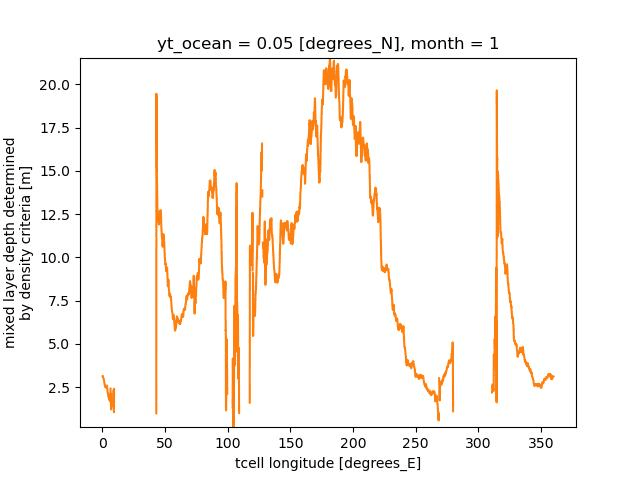

PosixPath('/g/data/es60/users/thomas_moore/clim_demo_results/plots/test.gif')

In [22]:
ds = mld_stats_equator
stream(ds[['std_mld','min_mld']], uri="/g/data/es60/users/thomas_moore/clim_demo_results/plots/test.gif",dim='month')

# $The$ $End$

In [ ]:
client.shutdown()

[WARNING] 04:32PM: No 'x' specified; using the default 'Year' from the dataframe. Suppress this by passing 'x'.
[WARNING] 04:32PM: No 'y' specified; using the default 'fertility' from the dataframe. Suppress this by passing 'y'.


<Client: 'tcp://127.0.0.1:33259' processes=7 threads=14, memory=63.00 GiB>

[SUCCESS] 04:32PM: Saved stream to /g/data/es60/users/thomas_moore/clim_demo_results/plots/gapminder.gif.


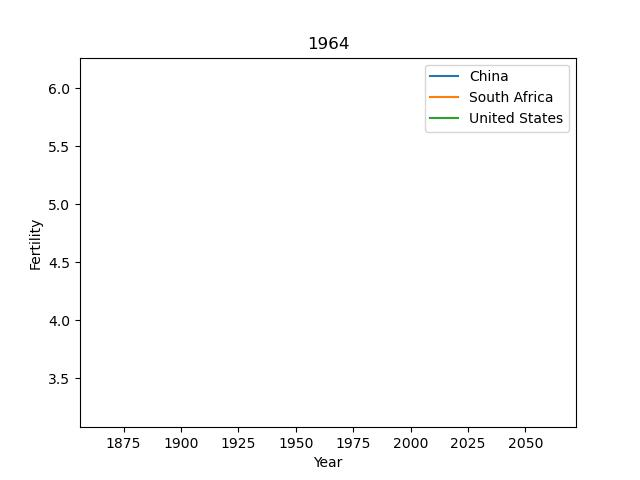

PosixPath('/g/data/es60/users/thomas_moore/clim_demo_results/plots/gapminder.gif')

In [11]:
from streamjoy import stream
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/franlopezguzman/gapminder-with-bokeh/master/gapminder_tidy.csv"
).set_index("Year")
df = df.query("Country in ['United States', 'China', 'South Africa']")
stream(df, uri="/g/data/es60/users/thomas_moore/clim_demo_results/plots/gapminder.gif", groupby="Country", title="{Year}")

In [12]:
df

Country  fertility      life   population  child_mortality  \
Year                                                                     
1964          China    6.12000  53.32072  696171650.0           130.77   
1965          China    6.02200  55.64680  710290299.0           115.43   
1966          China    6.21100  56.80320  727601056.0           120.80   
1967          China    5.25200  58.38112  747678772.0           126.42   
1968          China    6.37000  59.40520  769666505.0           132.30   
...             ...        ...       ...          ...              ...   
2009  United States    2.00200  78.35200  307686729.0             7.50   
2010  United States    1.92800  78.50700  310383948.0             7.40   
2011  United States    1.89704  78.65400  313085380.0             7.20   
2012  United States    1.89704  78.79700  315791284.0             7.10   
2013  United States    1.97600  78.94100  318497630.0             6.90   

          gdp               region  
Year                                
1964    713.0  East Asia & Pacific  
1965    772.0  East Asia & Pacific  
1966    826.0  East Asia & Pacific  
1967    719.0  East Asia & Pacific  
1968    669.0  East Asia & Pacific  
...       ...                  ...  
2009  48558.0              America  
2010  49373.0              America  
2011  49781.0              America  
2012  50549.0              America  
2013  51282.0              America  

[150 rows x 7 columns]

# looking for neative numbers

In [ ]:
nc_data = xr.open_dataset(results_path+results_file)

In [ ]:
nc_data

In [ ]:
nc_data.max()

## Plot current vectors for August

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from matplotlib import mlab, cm, gridspec
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline 

In [ ]:
%%time
# Define the u and v components of the currents
time_choice = 8
u = clim_uv.u.sel(month=time_choice)
v = clim_uv.v.sel(month=time_choice)
speed = np.sqrt(u**2 + v**2)

In [ ]:
#plot model data
transform = ccrs.PlateCarree()
cmap = 'Spectral_r'
cbar_label='current speed'
plot_data = speed

###
fig = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
ax = plt.subplot(projection=ccrs.PlateCarree(180))
ax.set_extent([142,160, -25, -10], ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='white'))
ax.coastlines('50m',linewidth=0.5,edgecolor='grey')
plot_data.plot(transform=transform,cmap=cmap,cbar_kwargs={'label': cbar_label,'shrink':0.5},robust=True)

#plot u/v vectors
# Define the x and y coordinates
x = clim_uv.xu_ocean
y = clim_uv.yu_ocean
ax.quiver(x.values,y.values,u.values,v.values,transform=transform, units='x', width=0.01, scale=0.7, headwidth=2,alpha=0.2)
ax.set_title('BRAN2020 1993-2022\ncurrent speed \n August Climatology')